In [80]:
#‌ Here, we import numpy for numerical operations and matplotlib.pyplot for data visualization.
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# This section generates training data using uniform distribution between -3 and 3
np.random.seed(20)
x = np.random.uniform(low=-3, high=3, size=(1000, 1))
y = x ** 2

In [92]:
# In this section, we define a neural network class with an initializer for weights and biases, a forward pass method, and a training method using gradient descent.
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = np.maximum(0, self.hidden_input)  # ReLU activation function
        self.final_output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        return self.final_output

    def train(self, X, y, learning_rate=0.001, epochs=100):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss
            loss = 0.5 * np.mean((y_pred - y)**2)

            d_loss = 2 * (y_pred - y) / X.shape[0]

            d_weights_hidden_output = np.dot(self.hidden_output.T, d_loss)
            d_bias_output = np.sum(d_loss, axis=0, keepdims=True)
            d_hidden = np.dot(d_loss, self.weights_hidden_output.T)

            d_hidden_input = d_hidden * (self.hidden_input > 0)
            d_weights_input_hidden = np.dot(X.T, d_hidden_input)
            d_bias_hidden = np.sum(d_hidden, axis=0, keepdims=True)

            # Update weights and biases
            self.weights_hidden_output -= learning_rate * d_weights_hidden_output
            self.bias_output -= learning_rate * d_bias_output
            self.weights_input_hidden -= learning_rate * d_weights_input_hidden
            self.bias_hidden -= learning_rate * d_bias_hidden


            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

In [93]:
# Here, we create an instance of the neural network with one input neuron, ten hidden neurons, and one output neuron.
input_size = 1
hidden_size = 10
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

# Starting Training Model
model.train(x, y, learning_rate=0.01, epochs=2000)

Epoch 0, Loss: 4.609293623666403
Epoch 10, Loss: 2.7467823074009234
Epoch 20, Loss: 1.4046372176055366
Epoch 30, Loss: 0.9487521790213025
Epoch 40, Loss: 0.7772354897870831
Epoch 50, Loss: 0.6611098058037055
Epoch 60, Loss: 0.5693222921272284
Epoch 70, Loss: 0.4943422655184257
Epoch 80, Loss: 0.43224241974018424
Epoch 90, Loss: 0.38085158830315896
Epoch 100, Loss: 0.3383375846736804
Epoch 110, Loss: 0.30313846681131007
Epoch 120, Loss: 0.2740632940196806
Epoch 130, Loss: 0.2500136916181797
Epoch 140, Loss: 0.23009341779679301
Epoch 150, Loss: 0.2135979210520169
Epoch 160, Loss: 0.19993713695546672
Epoch 170, Loss: 0.1885847931538324
Epoch 180, Loss: 0.17908660356853529
Epoch 190, Loss: 0.17116989076526234
Epoch 200, Loss: 0.16455182705997567
Epoch 210, Loss: 0.1589966654649038
Epoch 220, Loss: 0.15430260410374932
Epoch 230, Loss: 0.15033828465343219
Epoch 240, Loss: 0.14699273880453512
Epoch 250, Loss: 0.14415896788727367
Epoch 260, Loss: 0.14175364911276797
Epoch 270, Loss: 0.13969505

In [94]:
# Generate test data and use the trained model to make predictions (y_pred) on the test data.
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.forward(X_test)

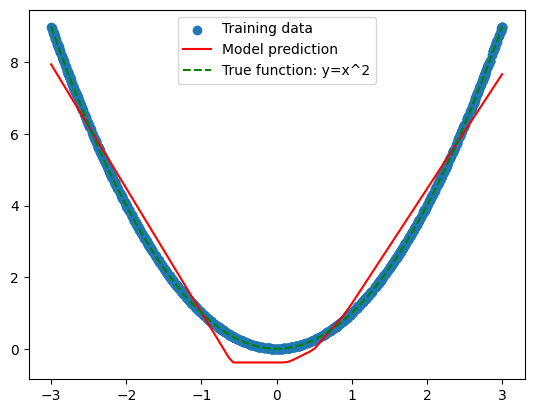

In [95]:
# Finally, we visualize the results by plotting the training data, the model predictions, and the true function
plt.scatter(x, y, label='Training data')
plt.plot(X_test, y_pred, color='red', label='Model prediction')
plt.plot(X_test, X_test**2, color='green', linestyle='dashed', label='True function: y=x^2')
plt.legend()
plt.show()